# Principal Component Analysis
- This notebook contains the code to implement the Principal Component Analysis algorithm from scratch using `Eigen Decomposition`

## Importing Libraries

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

## Custom Class

In [32]:
class PCA:

  def __init__(self,
               n_components=5,
               random_state=None):
    """
    Parameters:
    -----------

    n_components: int
                  The no. of principal components to determine

    random_state: int
                  For controlling the randomness and reproducibility of results across multiple runs
    """
    self.n_components = n_components
    self.random_state = random_state


  def plot_explained_variance(self, figsize=(6, 4)):
    plt.figure(figsize=figsize)
    x_range = range(1, len(self.total_explained_variance_ratio_) + 1)
    plt.plot(x_range,
             np.cumsum(self.total_explained_variance_ratio_),
             linewidth=2)
    plt.xlabel("No. of Principal Components (n)")
    plt.ylabel("Explained Variance Ratio")
    plt.title("Explained Variance vs No. of Components")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


  def fit(self, X, y=None):
    """
    This function will train a PCA model
    """
    if self.random_state:
      np.random.seed(self.random_state)

    self.means_ = np.mean(X, axis=0)
    X_centered = X - self.means_
    S = np.dot(X_centered.T, X_centered)
    eigen_values, eigen_vectors = np.linalg.eigh(S)

    self.components_ = eigen_vectors[:, ::-1][:, :self.n_components]
    self.total_explained_variance_ratio_ = eigen_values[::-1] / np.sum(eigen_values)
    self.explained_variance_ratio_ = self.total_explained_variance_ratio_[:self.n_components]
    print("> Successfully Trained the PCA model!\n")
    return self


  def transform(self, X):
    """
    This function will reduce the dimensionality of the dataset
    """
    X_centered = X - self.means_
    return np.dot(X_centered, self.components_)


  def inverse_transform(self, X):
    """
    This function will reconstruct the transformed dataset
    """
    return np.dot(X, self.n_components_.T) + self.means_

## Getting the Data

In [33]:
X, y = fetch_openml("mnist_784",
                    version=1,
                    return_X_y=True,
                    parser="auto")

print(X.shape, y.shape)

(70000, 784) (70000,)


In [34]:
np.bincount(y)

array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958])

In [35]:
print(np.unique(y))
print(len(np.unique(y)))

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
10


- This dataset contains 784 features and 10 unique output class labels

## Training the Model

In [37]:
pca = PCA(n_components=80)
pca.fit(X)

> Successfully Trained the PCA model!



In [38]:
np.sum(pca.total_explained_variance_ratio_)

1.0

In [39]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ,
       0.02106689, 0.02037553, 0.01707064, 0.0169402 , 0.01583382,
       0.01486345, 0.01319358, 0.01279014, 0.01187272, 0.01152937,
       0.0106604 , 0.01009794, 0.00959151, 0.00909635, 0.00883287,
       0.00838818, 0.00809832, 0.00785718, 0.00740262, 0.00690014,
       0.00656144, 0.0064547 , 0.00600819, 0.00585612, 0.00566754,
       0.00543471, 0.00504717, 0.00487079, 0.00478955, 0.00467594,
       0.00454369, 0.00444918, 0.00418217, 0.00396164, 0.00383708,
       0.00375785, 0.00361426, 0.00349025, 0.00338732, 0.00319696,
       0.00316854, 0.00310145, 0.0029648 , 0.00287101, 0.00282514,
       0.00269423, 0.00268392, 0.00256509, 0.00253168, 0.00244648,
       0.00239702, 0.00238581, 0.00229234, 0.00220949, 0.0021306 ,
       0.00206317, 0.00202781, 0.00195035, 0.00191471, 0.0018855 ,
       0.00186976, 0.00180104, 0.00176787, 0.00173359, 0.00164

In [40]:
np.sum(pca.explained_variance_ratio_)

0.8910304372992593

In [41]:
pca.components_.shape

(784, 80)

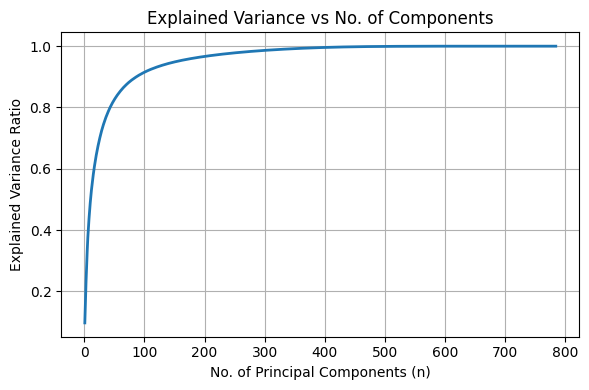

In [42]:
pca.plot_explained_variance()

In [43]:
X_pca = pca.transform(X)
X_pca.shape

(70000, 80)

## Final Remarks:
- The PCA algorithm was successfully implemented from scratch using Python
- The model was tested on the `MNIST` dataset comprising:
 - 70,000 observations
 - 784 features
- From the plot, it can be seen that:
 - About 100 features can explain 90% of the variance in the entire dataset
 - About 150 features can explain 95% of the variance in the entire dataset
- The dimensionality of any dataset can be reduced to any desired no. of dimensions seamlessly